In [ ]:
# !unzip '' - d''

In [3]:
tra= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data science/buterfly/Training_set.csv')
tra

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tra[:10]

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
5,Image_6.jpg,CAIRNS BIRDWING
6,Image_7.jpg,GREEN CELLED CATTLEHEART
7,Image_8.jpg,EASTERN DAPPLE WHITE
8,Image_9.jpg,BROWN SIPROETA
9,Image_10.jpg,RED POSTMAN


In [5]:
len(tra['label'])

6499

# labels

In [6]:
import os


In [7]:
start= '/content/drive/MyDrive/Colab Notebooks/data science/buterfly/train/'
filepaths=[]
for m in tra['filename']:
  new= start + m
  filepaths.append(new)

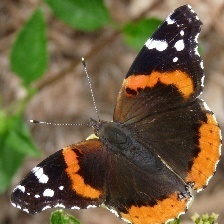

In [8]:
from IPython.display import Image
Image(filepaths[13])

In [9]:
labels=tra['label'].to_numpy()
labels

array(['SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', ..., 'APPOLLO',
       'ELBOWED PIERROT', 'ATALA'], dtype=object)

In [10]:
unique_labels = np.unique(labels)
unique_labels

array(['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88',
       'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK',
       'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO',
       'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE',
       'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA',
       'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL',
       'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH',
       'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE',
       'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED',
       'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART',
       'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA',
       'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA',
       'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK',
       'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY',
       'PAPER KITE', 'PEACOCK', 'PINE WHIT

In [11]:
boolean_l = [label==unique_labels for label in labels]
len(boolean_l)

6499

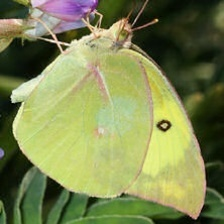

In [12]:
Image(filepaths[0])

In [13]:
filepaths[2]

'/content/drive/MyDrive/Colab Notebooks/data science/buterfly/train/Image_3.jpg'

# split data

In [14]:
x = filepaths
y = boolean_l

In [15]:
# first training on 1500
NUM_1500= 1500 #@param{type:'slider', min:100, max:1500, step:100}

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_1500],
                                                  y[:NUM_1500],
                                                  random_state=42,
                                                  test_size=0.2)
len(x_train), len(x_val), len(y_train), len(y_val)

(1200, 300, 1200, 300)

In [17]:
import tensorflow as tf
import tensorflow_hub as hub

# Processing Image

In [18]:
img_size= 224
def image_manu(fp):
  image = tf.io.read_file(fp)
  image =tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image= tf.image.resize(image, size=[img_size, img_size])
  return image

##Get image label

In [19]:
def get_image_label(fp, label):
  image =image_manu(fp)
  return image, label

##BATCHes

In [20]:
BATCH_SIZE =32
def create_batch(x,y=None,batch_size=BATCH_SIZE,test_data=False, validation_data=False):
  if test_data:
    print("Creating test data batches...")

    data= tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch= data.map(image_manu).batch(BATCH_SIZE)
    return data_batch

  elif validation_data:
    print('creating validation data batches.....')

    data =tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    data_batch= data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print('Creating training data batches....')
    data= tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    # shuffle
    data= data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [21]:
train_data= create_batch(x_train, y_train)

Creating training data batches....


In [22]:
val_data= create_batch(x_val, y_val, validation_data=True)

creating validation data batches.....


In [23]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 75), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 75), dtype=tf.bool, name=None)))

In [24]:
len(val_data), len(train_data)

(10, 38)

In [25]:
val_images, val_labels = next(val_data.as_numpy_iterator())

In [26]:
train_images, train_labels=next(train_data.as_numpy_iterator())
train_labels

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [27]:
def show_25(image, label):
  plt.figure(figsize=(8,10))
  for m in range(25):
    ax=plt.subplot(5,5,m+1)
    plt.imshow(image[m])
    plt.axis('off')
    plt.title(unique_labels[label[m].argmax()])



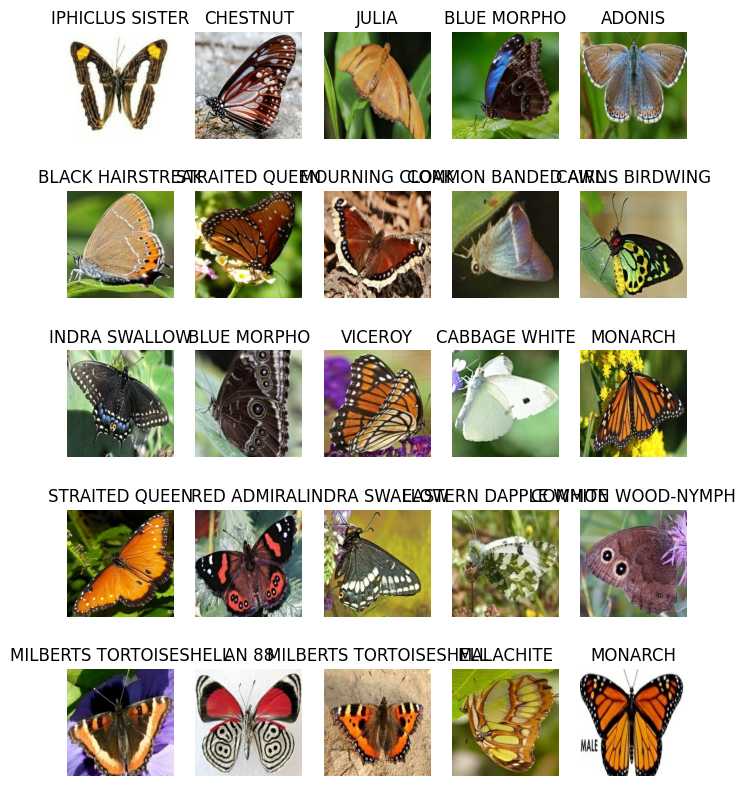

In [28]:
show_25(val_images, val_labels)

# Building a model

In [36]:
INPUT_SHAPE = [None, 224,224,3]
OUTPUT_SHAPE =len(unique_labels)
MODEL_URL ='https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-classification/versions/2'

In [37]:
def pre_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  #set up layers
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL),
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation='softmax')])
  #compile model
  model.compile(
      loss= tf.keras.losses.CategoricalCrossentropy(),
      optimizer= tf.keras.optimizers.Adam(),
      metrics= ['accuracy']
  )

  #build model
  model.build(INPUT_SHAPE)
  return model

In [38]:
model =pre_model()

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1000)              7200312   
                                                                 
 dense_3 (Dense)             (None, 75)                75075     
                                                                 
Total params: 7275387 (27.75 MB)
Trainable params: 75075 (293.26 KB)
Non-trainable params: 7200312 (27.47 MB)
_________________________________________________________________


# Callbacks

In [40]:
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                 patience=2)

In [41]:
def pre_train():
  model=pre_model()
  #fitting
  model.fit(x=train_data,
            validation_data=val_data,
            callbacks= early_stopping,
            validation_freq=1,
            epochs=50)
  return model

In [ ]:
tizi= pre_train()

Epoch 1/50
38/38 [==============================] - 12s 95ms/step - loss: 3.5609 - accuracy: 0.2108 - val_loss: 2.1541 - val_accuracy: 0.5033
Epoch 2/50
38/38 [==============================] - 3s 75ms/step - loss: 1.4958 - accuracy: 0.6892 - val_loss: 1.3749 - val_accuracy: 0.6700
Epoch 3/50
38/38 [==============================] - 3s 91ms/step - loss: 0.8660 - accuracy: 0.8408 - val_loss: 1.1407 - val_accuracy: 0.7367
Epoch 4/50
38/38 [==============================] - 4s 100ms/step - loss: 0.5821 - accuracy: 0.9100 - val_loss: 0.9852 - val_accuracy: 0.7433
Epoch 5/50
38/38 [==============================] - 3s 73ms/step - loss: 0.4220 - accuracy: 0.9467 - val_loss: 0.8890 - val_accuracy: 0.8000
Epoch 6/50
38/38 [==============================] - 3s 74ms/step - loss: 0.3168 - accuracy: 0.9600 - val_loss: 0.8410 - val_accuracy: 0.7933
Epoch 7/50
38/38 [==============================] - 3s 74ms/step - loss: 0.2457 - accuracy: 0.9808 - val_loss: 0.8016 - val_accuracy: 0.7933
Epoch 8/50


In [ ]:
predictions=tizi.predict(val_data)

10/10 [==============================] - 4s 80ms/step


# Unbatch data


In [ ]:
images=[]
labels=[]
def unbatching(data):
  for image, label in data.unbatch():
    images.append(image)
    labels.append(unique_labels[np.argmax(label)])

  return images,labels
val_images, val_label = unbatching(val_data)

In [ ]:
len(val_images)

300

In [ ]:
len(val_label)

300

In [ ]:
# get label
def get_label(preprob):
  return unique_labels[np.argmax(preprob)]

In [ ]:
get_label(predictions[13])

'CABBAGE WHITE'

In [ ]:
val_label[13]

'CABBAGE WHITE'

# FULL TRAINNG

In [ ]:
full_data= create_batch(x,y)

Creating training data batches....


In [ ]:
tizi.fit(x=full_data,
         epochs=30,
         callbacks=early_stopping)

Epoch 1/30
204/204 [==============================] - 687s 3s/step - loss: 0.5226 - accuracy: 0.8595
Epoch 2/30
204/204 [==============================] - 13s 63ms/step - loss: 0.2505 - accuracy: 0.9377
Epoch 3/30
204/204 [==============================] - 13s 65ms/step - loss: 0.1658 - accuracy: 0.9605
Epoch 4/30
204/204 [==============================] - 13s 64ms/step - loss: 0.1183 - accuracy: 0.9765
Epoch 5/30
204/204 [==============================] - 14s 66ms/step - loss: 0.0909 - accuracy: 0.9822
Epoch 6/30
204/204 [==============================] - 14s 67ms/step - loss: 0.0733 - accuracy: 0.9874
Epoch 7/30
204/204 [==============================] - 13s 65ms/step - loss: 0.0588 - accuracy: 0.9902
Epoch 8/30
204/204 [==============================] - 13s 65ms/step - loss: 0.0490 - accuracy: 0.9931
Epoch 9/30
204/204 [==============================] - 14s 66ms/step - loss: 0.0401 - accuracy: 0.9949
Epoch 10/30
204/204 [==============================] - 12s 59ms/step - loss: 0.0335

In [ ]:
t= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data science/buterfly/Testing_set.csv')
t

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
2781,Image_2782.jpg
2782,Image_2783.jpg
2783,Image_2784.jpg
2784,Image_2785.jpg


In [ ]:
stop='/content/drive/MyDrive/Colab Notebooks/data science/buterfly/test/'
test_fp=[]
for j in t['filename']:
  test_fp.append(stop+j)

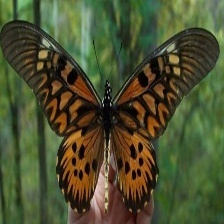

In [ ]:
Image(test_fp[10])

In [ ]:
test_batch= create_batch(test_fp,test_data=True)


Creating test data batches...


In [ ]:
test_pred=tizi.predict(test_batch)

88/88 [==============================] - 5s 58ms/step


In [ ]:
predicted_label=[]
for y in test_pred:
  pred_label= get_label(y)
  predicted_label.append(pred_label)

In [ ]:
t['Predicted names'] = predicted_label

In [ ]:
t

,filename,Predicted names
0,Image_1.jpg,PINE WHITE
1,Image_2.jpg,CRIMSON PATCH
2,Image_3.jpg,ADONIS
3,Image_4.jpg,GREAT JAY
4,Image_5.jpg,MILBERTS TORTOISESHELL
...,...,...
2781,Image_2782.jpg,SILVER SPOT SKIPPER
2782,Image_2783.jpg,COMMON WOOD-NYMPH
2783,Image_2784.jpg,CLOUDED SULPHUR
2784,Image_2785.jpg,COMMON WOOD-NYMPH


In [ ]:
tizi.save('butterfly.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
